In [41]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [43]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [7]:
df_glu = pd.read_excel('~/Downloads/dfab_ad.xlsx')

df_glu = thermo_df(df_glu)
print(df_glu.shape)

(3941, 5)


mass_x (66,) mass_y (66,)
mass_x (64,) mass_y (64,)


/Users/bryan/Virtuals/vir_nb2/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/Users/bryan/Virtuals/vir_nb2/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


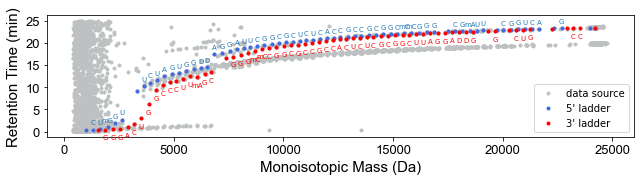

In [18]:
# major

df_glu_3p_1 = pd.read_excel('~/Downloads/dfm_merge_217_3p.xlsx')
df_glu_5p_1 = pd.read_excel('~/Downloads/dfm_merge_217_5p.xlsx')
fig = plt.figure(figsize=(9, 2.5))

plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

df5p = df_glu_5p_1.copy()
df3p = df_glu_3p_1.copy()
marker = '.'
df_src = df_glu[(df_glu.Mass<26000)&(df_glu.RT<25)]
plt.scatter(df_src.Mass, df_src.RT, color='#bdc1c1', marker=marker, label="data source")
plt.scatter(df5p.Mass, df5p.RT, color='royalblue', marker=marker, label="5' ladder")
plt.scatter(df3p.Mass, df3p.RT, color='red', marker=marker, label="3' ladder")

for idx, df_sample in enumerate([df5p, df3p]):
    color = 'r' if idx == 1 else 'C0'
    yaxis = -10 if idx == 1 else 5
    bcr = base_calling_random(df_sample)
    for t in bcr[1]:
        df_pair = df_sample[df_sample.Mass.isin(t[:2])]
        idmax = df_pair.Mass.idxmax()
        plt.annotate(s=t[2], size=7, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(0, yaxis), color=color, ha='center')

plt.legend()

# ax2.set_xticks()
# ax2.cla()
# plt.scatter(df_skeleton.Mass, df_skeleton.RT, color='royalblue')
# plt.scatter(df_phe_big.iloc[1].Mass, df_phe_big.iloc[1].RT, color='royalblue')

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/tRNA_glu_ladders.svg', transparent=True, dpi=300)

0 (66, 6)
1 (55, 6)
2 (37, 6)
3 (50, 6)
4 (38, 6)
5 (63, 7)
6 (53, 7)
7 (32, 6)
8 (18, 6)
9 (54, 6)
(359, 9)


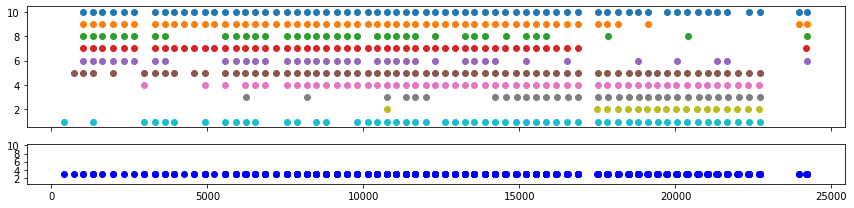

In [59]:
# 5p & 3p --> 5p

df_5p_217 = pd.read_excel('~/Downloads/dfm_merge_217_5p.xlsx')
df_5p_203 = pd.read_excel('~/Downloads/dfm_merge_203_5p.xlsx')
df_5p_189 = pd.read_excel('~/Downloads/dfm_merge_189_5p.xlsx')

df_5p_232 = pd.read_excel('~/Downloads/dfm_merge_232_5p.xlsx')
df_5p_218 = pd.read_excel('~/Downloads/dfm_merge_218_5p.xlsx')

df_3p_217_rev = pd.read_excel('~/Downloads/dfm_merge_217_3p_rev.xlsx')
df_3p_203_rev = pd.read_excel('~/Downloads/dfm_merge_203_3p_rev.xlsx')
df_3p_189_rev = pd.read_excel('~/Downloads/dfm_merge_189_3p_rev.xlsx')

df_3p_232_rev = pd.read_excel('~/Downloads/dfm_merge_232_3p_rev.xlsx')
df_3p_218_rev = pd.read_excel('~/Downloads/dfm_merge_218_3p_rev.xlsx')

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 3), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

dfs = [(df_5p_217, "24217 5'"), 
       (df_5p_203, "24203 5'"), 
       (df_5p_232, "24232 5'"), 
       (df_5p_189, "24189 5'"), 
       (df_5p_218, "24218 5'"), 
       (df_3p_217_rev, "24217 3' --> 5'"),
       (df_3p_203_rev, "24203 3' --> 5'"),
       (df_3p_232_rev, "24232 3' --> 5'"),
       (df_3p_189_rev, "24189 3' --> 5'"),
      (df_3p_218_rev, "24218 3' --> 5'")
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/tRNA_glu_complement.svg', transparent=True, dpi=300)

0 (33, 6)
1 (38, 6)
2 (60, 6)
3 (62, 6)
(188, 8)


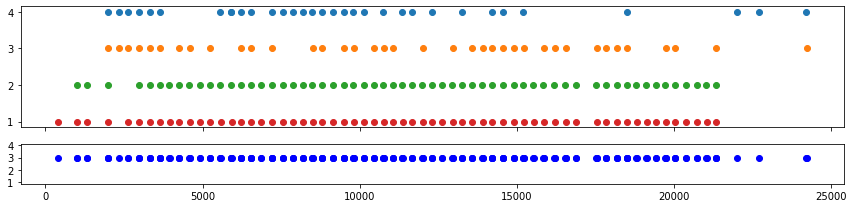

In [60]:
# 5p & 3p --> 5p

df_5p_204 = pd.read_excel('~/Downloads/dfm_merge_204_5p.xlsx')
df_5p_218 = pd.read_excel('~/Downloads/dfm_merge_218_5p.xlsx')

df_3p_204_rev = pd.read_excel('~/Downloads/dfm_merge_204_3p_rev.xlsx')
df_3p_218_rev = pd.read_excel('~/Downloads/dfm_merge_218_3p_rev.xlsx')

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 3), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

dfs = [
       (df_5p_204, "24204 5'"), 
       (df_5p_218, "24218 5'"), 
       (df_3p_204_rev, "24204 3' --> 5'"),
      (df_3p_218_rev, "24218 3' --> 5'")
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/tRNA_glu_complement.svg', transparent=True, dpi=300)

            Mass        RT         Vol         RA        FA     Ratio
35  24217.314389  3.843214  8228353.75  22.426814  4.850746  0.587459
38  24203.310593  3.906337  2606304.72   7.103622  1.536458  0.186076
32  24232.288354  3.843214  2517215.46   6.860804  1.483939  0.179715
40  24189.307523  3.875325   530166.79   1.444998  0.312542  0.037851
34  24218.327801  4.004629    83444.69   0.227433  0.049192  0.005957
33  24231.328815  3.979948    24878.14   0.067807  0.014666  0.001776
37  24204.285779  3.820968    16333.54   0.044518  0.009629  0.001166


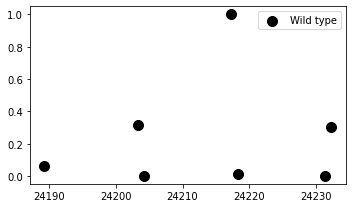

In [53]:
# tRNA
dfa = pd.read_excel('/Users/bryan/Documents/Data/UC/UC_Glu_1.xlsx')
dfa = thermo_df(dfa)
dfa_alkb = pd.read_excel('/Users/bryan/Documents/Data/UC/UC_Glu_2.xlsx')
dfa_alkb = thermo_df(dfa_alkb)

dfa_25k = dfa[(dfa.Mass>24189)&(dfa.Mass<24233)&(dfa.Vol>10000)].copy()
dfa_25k['Ratio'] = dfa_25k.Vol/dfa_25k.Vol.sum()
print(dfa_25k.sort_values('Vol', ascending=False))

# dfa_25k = dfa[(dfa.Mass>24170)&(dfa.Mass<24310)]
dfa_alkb_25k = dfa_alkb[(dfa_alkb.Mass>24170)&(dfa_alkb.Mass<24310)]
df1 = dfa_25k.copy()
df2 = dfa_alkb_25k.copy()
plotly_zone(df1, y='Vol')

df_sample = df1
ms = 24217.3
mask = np.abs(df_sample.Mass - ms) < 0.1
specific_dot = df_sample[mask]
df_sample = df2
ms =  24204.29
mask = np.abs(df_sample.Mass - ms) < 0.1
specific_dot2 = df_sample[mask]
# print(specific_dot.Vol, specific_dot2.Vol)

# df_25k = df_phe[(df_phe.Mass>24000)&(df_phe.Mass<24800)]
# plot_zone(df_25k, y='Vol')
fig = plt.figure(figsize=(5, 3))
vol1 = df1.Vol.max()
vol2 = df2.Vol.max()
vol = max(vol1, vol2)
plt.scatter(df1.Mass, df1.Vol/vol, s=100, color='black', label='Wild type') ##bdc1c1
# plt.scatter(df2.Mass, df2.Vol/vol, s=100, marker='s', color='r', label='AlkB') ##d9d9d9
plt.legend()

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/glu_intact_masses.svg', transparent=True, dpi=300)

In [31]:
dfx = pd.read_excel('~/Downloads/dfm_merge_203_3p.xlsx')
dfo = dfx.sort_values('Mass').copy()
dfo['Mass'] = dfo.Mass.max() - dfo.Mass + H2O
dfo = dfo[dfo.Mass>200]
dfo.to_excel('~/Downloads/dfm_merge_203_3p_rev.xlsx')

In [34]:
dfx3 = pd.read_excel('~/Downloads/dfm_merge_203_3p_rev.xlsx')
dfx7 = pd.read_excel('~/Downloads/dfm_merge_217_3p_rev.xlsx')
dfx3.shape, dfx7.shape

((53, 7), (63, 7))